<a href="https://colab.research.google.com/github/thiiagofernando/ocr_opencv_python/blob/master/Projeto_Final_OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opencv-python==4.6.0.66
!sudo apt install tesseract-ocr
!pip install pytesseract==0.3.9


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [2]:
! git clone https://github.com/sthemonica/text-recognize

fatal: destination path 'text-recognize' already exists and is not an empty directory.


In [3]:
import pytesseract
import numpy as np
import cv2
import re
import os
import matplotlib.pyplot as plt

from PIL import ImageFont, ImageDraw, Image
from pytesseract import Output
from google.colab.patches import cv2_imshow


In [4]:
!mkdir tessdata
!wget -O ./tessdata/por.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true
!wget -O ./tessdata/eng.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/eng.traineddata?raw=true


mkdir: cannot create directory ‘tessdata’: File exists
--2024-05-04 20:44:24--  https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/tesseract-ocr/tessdata/raw/main/por.traineddata [following]
--2024-05-04 20:44:24--  https://github.com/tesseract-ocr/tessdata/raw/main/por.traineddata
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/por.traineddata [following]
--2024-05-04 20:44:24--  https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/por.traineddata
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|18

In [5]:
projeto = "/content/text-recognize/Imagens/Projeto"
caminho = [os.path.join(projeto, f) for f in os.listdir(projeto)]
print(caminho)


['/content/text-recognize/Imagens/Projeto/artigo-eng-dados.png', '/content/text-recognize/Imagens/Projeto/artigo-termos-ML.png', '/content/text-recognize/Imagens/Projeto/artigo-spark.png', '/content/text-recognize/Imagens/Projeto/artigo-desbalanceamento.png']


In [6]:
def mostrar(img):
  fig = plt.gcf() # busca a figura atual
  fig.set_size_inches(20, 10) #define o tamanho
  plt.axis("off") #remove a visualização dos eixos
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) #faz a conversão de cores com o OpenCV
  plt.show() # mostra a imagem


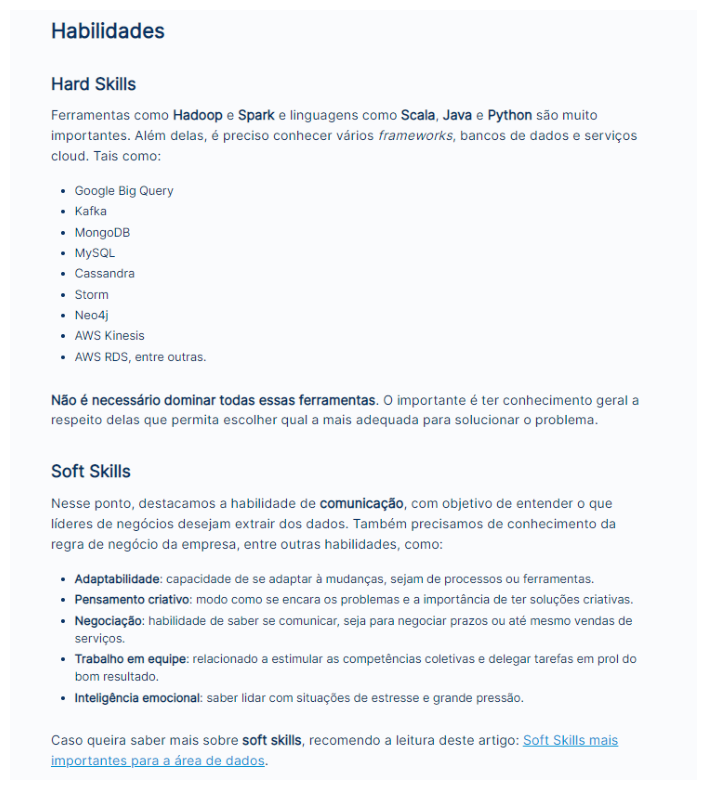

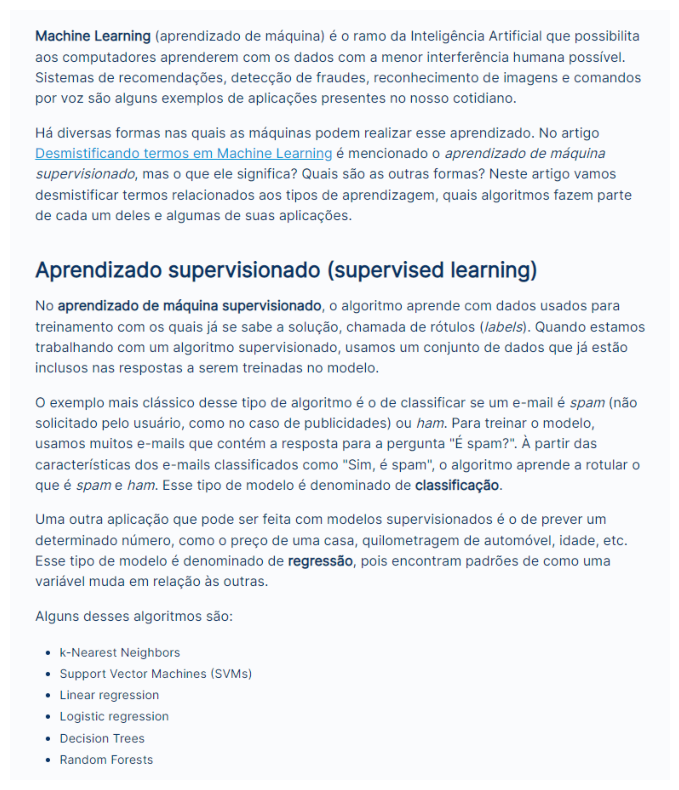

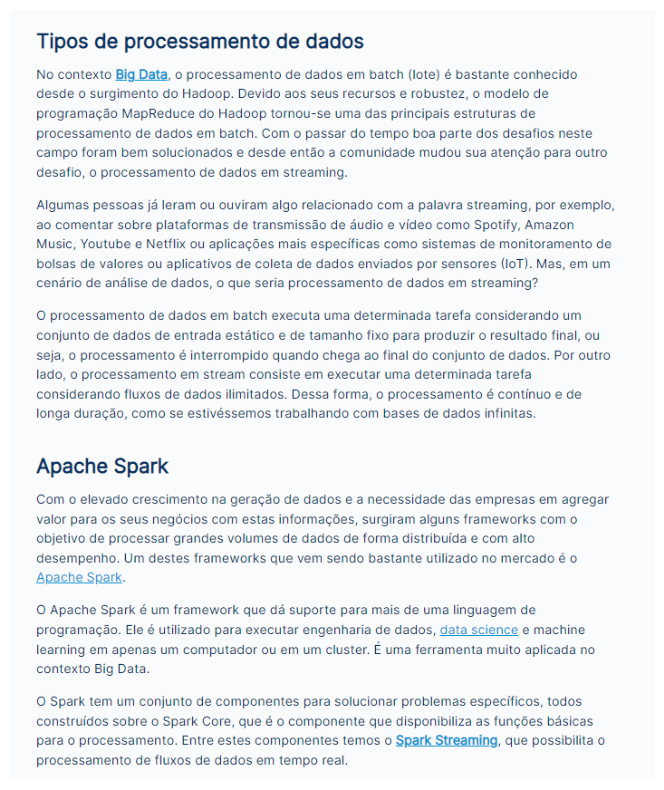

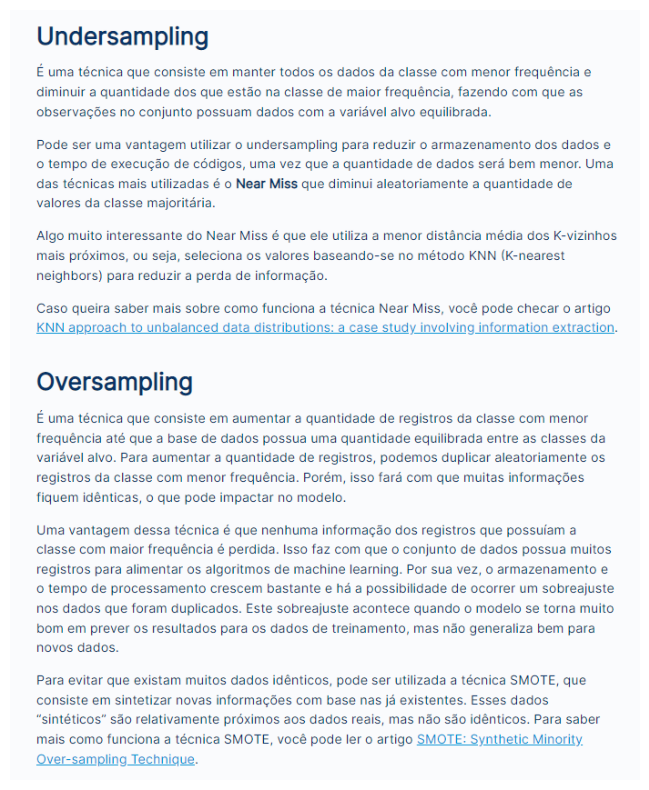

In [7]:
for imagem in caminho:
  imagem = cv2.imread(imagem)
  mostrar(imagem)


In [8]:
config_tesseract = "--tessdata-dir tessdata"

def OCR_processa(img, config_tesseract):
  texto = pytesseract.image_to_string(img, lang='por', config=config_tesseract)
  return texto


In [9]:
texto_completo = ''
nome_txt = 'resultados_ocr.txt'


In [10]:
for imagem in caminho: # percorre as imagens no caminho
  img = cv2.imread(imagem)
  nome_imagem = os.path.split(imagem)[-1] ## recebe os nomes e diretórios das imagens, quebrados, precisamos apenas do -1 (última posição do diretório)
  nome_divisao = '===================\n' + str(nome_imagem) #divisão + nome da imagem que está sendo vista
  texto_completo = texto_completo + nome_divisao + '\n' # recebe o texto completo + a divisão + /n para pular a linha
  texto = OCR_processa(img, config_tesseract) #passa a imagem que vamos utilizar, no caso em cada imagem
  texto_completo = texto_completo + texto # concatena as duas variáveis


In [11]:
## Salvando o arquivo em txt
arquivo_txt = open(nome_txt, 'w+') # a+ é para colocar no final do arquivo, w+ para sobre escrever o arquivo
arquivo_txt.write(texto_completo + '\n') #passa o texto que quer adicionar
arquivo_txt.close()


In [12]:
texto_completo

'===================\nartigo-eng-dados.png\nHabilidades\n\nHard Skills\n\nFerramentas como Hadoop e Spark e linguagens como Scala, Java e Python são muito\nimportantes. Além delas, é preciso conhecer vários frameworks, bancos de dados e serviços\ncloud. Tais como:\n\n* Google Big Query\n* Kafka\n\n* MongoDB\n\n* MySQL\n\n* Cassandra\n\n- Sstorm\n\n* Neo4j\n\n* AWSKinesis\n\n* AWS RDS, entre outras.\n\nNão é necessário dominar todas essas ferramentas. O importante é ter conhecimento geral a\nrespeito delas que permita escolher qual a mais adequada para solucionar o problema.\n\nSoft Skills\n\nNesse ponto, destacamos a habilidade de comunicação, com objetivo de entender o que\nlíderes de negócios desejam extrair dos dados. Também precisamos de conhecimento da\nregra de negócio da empresa, entre outras habilidades, como:\n\n* Adaptabilidade: capacidade de se adaptar à mudanças, sejam de processos ou ferramentas.\n\n* Pensamento criativo: modo como se encara os problemas e a importância de

In [13]:
termo_pesquisa = 'learning'


In [14]:
with open(nome_txt) as f: # abre o documento txt
  ocorrencias = [i.start() for i in re.finditer(termo_pesquisa, f.read())] #ocorrencia é uma lista.
  #inicia-se em i e o termo re é de expressões regulares, o módulo finditer é para encontrar um termo de pesquisa dentro do arquivo
  #por isso os parâmetros são, respectivamente, termo_pesquisa e arquivo a ser lido.


In [15]:
ocorrencias

[2227, 5426, 7490]

In [16]:
for imagem in caminho:
  img = cv2.imread(imagem) #carrega a imagem
  nome_imagem = os.path.split(imagem)[-1] # passa a imagem e acessa a última posição do diretório
  print('====================\n' + str(nome_imagem)) # separação + nome da imagem

  texto = OCR_processa(img, config_tesseract) #usando o OCR

  ocorrencias = [i.start() for i in re.finditer(termo_pesquisa, texto)] #usando o finditer novamente no texto

  print('Número de ocorrências para o termo: {}: {}'.format(termo_pesquisa, len(ocorrencias)))
  #primeira chaves é para termo de pesquisa e a segunda é para ocorrencias
  print('\n')



artigo-eng-dados.png
Número de ocorrências para o termo: learning: 0


artigo-termos-ML.png
Número de ocorrências para o termo: learning: 1


artigo-spark.png
Número de ocorrências para o termo: learning: 1


artigo-desbalanceamento.png
Número de ocorrências para o termo: learning: 1




In [25]:
fonte_dir = '/content/text-recognize/Imagens/calibri.ttf'


In [26]:
def escreve_texto(texto, x, y, img, fonte_dir, cor=(50, 50, 255), tamanho=16):
  fonte = ImageFont.truetype(fonte_dir, tamanho)
  img_pil = Image.fromarray(img)
  draw = ImageDraw.Draw(img_pil)
  draw.text((x, y-tamanho), texto, font = fonte, fill = cor)
  img = np.array(img_pil)

  return img


In [27]:
min_conf = 30  #@param {type:"slider", min:0, max:100}


In [28]:
def caixa_texto(i, resultado, img, cor=(255, 100, 0)):
  x = resultado["left"][i]
  y = resultado["top"][i]
  w = resultado["width"][i]
  h = resultado["height"][i]

  cv2.rectangle(img, (x, y), (x + w, y + h), cor, 2)

  return x, y, img


In [29]:
def OCR_processa_imagem(img, termo_pesquisa, config_tesseract, min_conf):
  resultado = pytesseract.image_to_data(img, config=config_tesseract, lang='por', output_type=Output.DICT) #imagem para dados, que já fizemos anteriormente
  num_ocorrencias = 0 #inicializando como 0

  for i in range(0, len(resultado['text'])): # vai de 0 ao tamanho do número de valores do texto
    confianca = int(resultado['conf'][i]) # qual a confiança da detecção
    if confianca > min_conf: # se a confiança for maior que o valor mínimo, passa para a linha abaixo
      texto = resultado['text'][i].lower() #texto será igual ao resultado text no momento i
      if termo_pesquisa in texto: #se o termo de pesquisa estiver no texto:
        x, y, img = caixa_texto(i, resultado, img, (0,0,255)) # faz a caixa de bounding box
        img = escreve_texto(texto, x, y, img, fonte_dir, (50,50,225), 14) #escreve o texto

        num_ocorrencias += 1 #faz a iteração no num de ocorrências e volta para o laço até acabar o texto
  return img, num_ocorrencias


artigo-eng-dados.png
Número de ocorrências para learning em artigo-eng-dados.png: 0




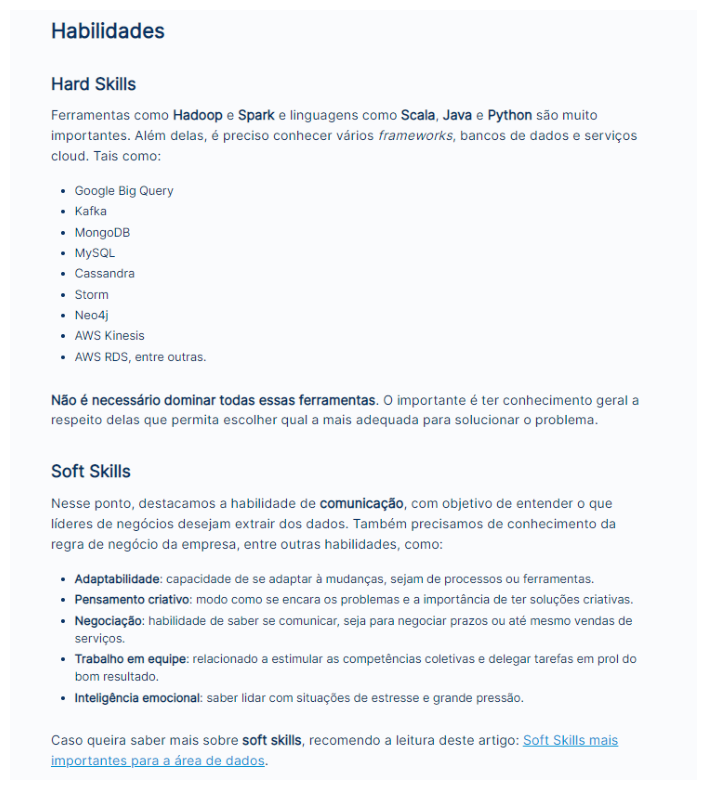

artigo-termos-ML.png
Número de ocorrências para learning em artigo-termos-ML.png: 3




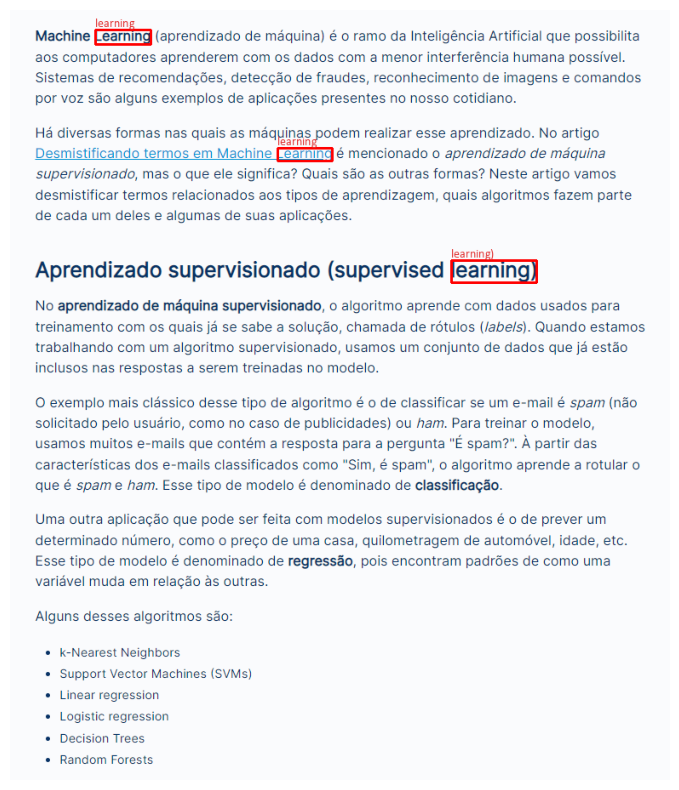

artigo-spark.png
Número de ocorrências para learning em artigo-spark.png: 1




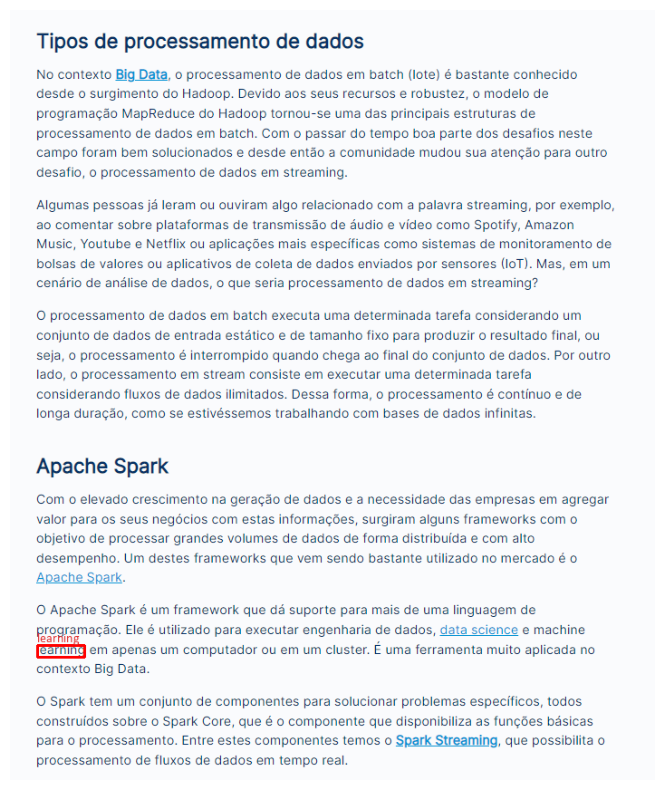

artigo-desbalanceamento.png
Número de ocorrências para learning em artigo-desbalanceamento.png: 1




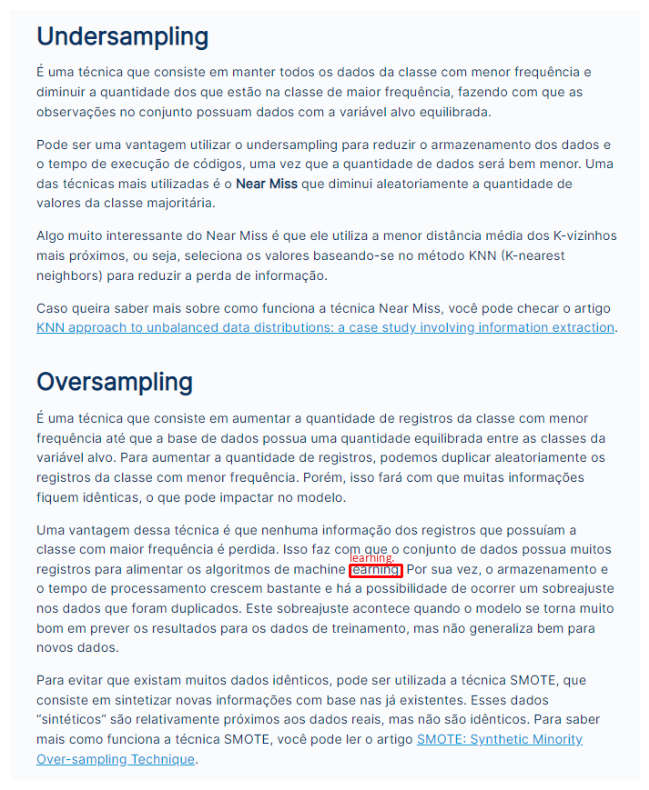

In [30]:
termo_pesquisa = 'learning'

for imagem in caminho:
  img = cv2.imread(imagem) #carrega a imagem
  img_original = img.copy() #cria uma cópia da imagem para não escrever em cima da original

  nome_imagem = os.path.split(imagem)[-1] # passa a imagem e acessa a última posição do diretório
  print('===================\n' + str(nome_imagem))  # separação + nome da imagem

  img, numero_ocorrencias = OCR_processa_imagem(img, termo_pesquisa.lower(), config_tesseract, min_conf) #usando o OCR_processa_imagem
  print('Número de ocorrências para {} em {}: {}'.format(termo_pesquisa.lower(), nome_imagem, numero_ocorrencias))
    #primeira chaves é para termo de pesquisa e a segunda nome das imagens e a terceira é o numeros de ocorrencias
  print('\n')

  mostrar(img)
